In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (9.0, 9.0)

In [101]:
from itertools import permutations

In [94]:
cell_size = 80

In [95]:
img = np.zeros((3 * cell_size, 6 * cell_size), dtype=np.uint8)

In [96]:
colors = [0, 128, 255]

In [102]:
figures = ['circle', 'triangle', 'rectangle']

In [97]:
def generate_cell(size, color):
    return np.zeros((cell_size, cell_size), dtype=np.uint8) + color

In [98]:
def draw_figure(cell, fig_type, color):
    if fig_type == 'circle':
        return cv2.circle(cell,(cell.shape[0] // 2, cell.shape[1] // 2), cell.shape[0] // 3, color, -1)
    elif fig_type == 'triangle':
        a = cell.shape[0] * 3 // 4
        h = a * np.sqrt(3) // 2
        pts = np.array([[a//2 ,0],[-a//2 ,0],[0, h]], np.int32) + np.array([cell.shape[0]//2, a//3])
        pts = pts.reshape((-1,1,2))
        return cv2.fillPoly(cell, [pts], color)
    elif fig_type == 'rectangle':
        return cv2.rectangle(cell,(cell.shape[0] // 4, cell.shape[1] // 4),
                             (cell.shape[0] * 3 // 4, cell.shape[1] * 3 // 4), color, cv2.FILLED)
    else:
        raise Exception('unsupported figure type')

In [104]:
iterator = permutations([0,1,2], 2)
for i in iterator:
    print(i)

(0, 1)
(0, 2)
(1, 0)
(1, 2)
(2, 0)
(2, 1)


In [109]:
def fill_image(img):
    iterator = permutations([0,1,2], 2)
    cells = []
    for pair in iterator:
        for figure in figures:
            cells.append(draw_figure(generate_cell(cell_size, colors[pair[0]]), figure, colors[pair[1]]))
    index = 0
    for y in range(0, 3 * cell_size, cell_size):
        for x in range(0, 6 * cell_size, cell_size):
            img[y:y+cell_size, x:x+cell_size] = cells[index]
            index += 1
    return img

In [110]:
res = fill_image(img)

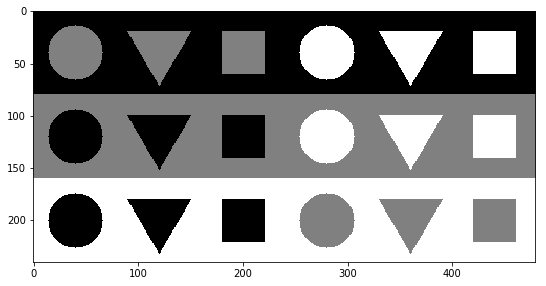

In [112]:
plt.imshow(res, cmap='gray')